# Titanic
-  Binary Classification


In [576]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import copy
warnings.filterwarnings(action = 'ignore')
plt.rcParams['font.family'] = 'KBIZmjo M'
%matplotlib inline

In [577]:
train = pd.read_csv('Desktop/데이터분석/titanic/train.csv')
test = pd.read_csv('Desktop/데이터분석/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [578]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- PassengerId : 승객번호
- Survived : 생존여부(0,1)
- Pclass : 승선권 클래스 (1,2,3)
- Name : 이름
- Sex : 성별
- Age : 나이
- SibSp : 동반한 형재자매, 배우자 수
- Parch : 동반한 부모, 자식 수
- Ticket : 티켓번호
- Fare : 티켓요금
- Cabin : 객실 번호
- Embarked : 승선한 항구명(C, Q, S)

# Selection of Feature & Data preparation


In [579]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- PassengerId, Ticket,Cabin :다른 승객들과 공통점을 찾을 수 없고, Cabin은 결측치가 너무 많음

In [580]:
train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [581]:
#결측치 채우기(가장 많은 'S'로)
train.Embarked  = train.Embarked.fillna('S')

- Name

In [582]:
#칭호 분리하기
tmp = []
for i in train.Name[:]:
    tmp.append(i.split(',')[1].split('.')[0])
train.Name = tmp
tmp2 = []
for i in test.Name[:]:
    tmp2.append(i.split(',')[1].split('.')[0])
test.Name = tmp2
train.Name.head(10)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
Name: Name, dtype: object

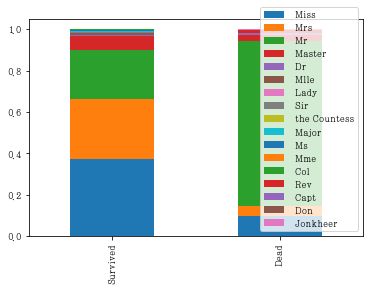

In [583]:
s  = train.loc[train.Survived == 1].Name.value_counts(normalize = True)
d = train.loc[train.Survived==0].Name.value_counts(normalize  =True)
dfN = pd.DataFrame([s,d],index = ['Survived','Dead'])
dfN.plot.bar(stacked = True)

----------------------------------
가장 생존자가 많은 칭호는 Miss와 Mrs이다. 가장 사망자가 많은 칭호는 Mr이다.

##### 결론: 성별과 관계있어보이지만 피처로 선택해도 괜찮은 정보일 것 같다.


- Pclass

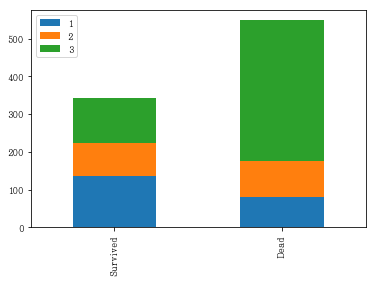

In [584]:
sur = train.loc[train.Survived==1]
nsur = train.loc[train.Survived == 0]
pS = sur.Pclass
pD = nsur.Pclass
dP = pd.DataFrame([pS.value_counts(),pD.value_counts()], index=['Survived', 'Dead'])
dP.plot.bar(stacked = True)

In [585]:
dP

,1,2,3
Survived,136,87,119
Dead,80,97,372


-----------------------
위 그래프를 보면 3등급 승선권을 가진 승객이 가장 많이 죽었고, 1등급 승선권을 가진 승객이 가장 많이 살아남은 것을 알 수 있다.

 
1등급 생존자 비율 : 136/216 =>63%


2등급 생존자 비율 : 87/184 => 47%


3등급 생존자 비율 : 119/491 => 24%



##### 결론: Pclass가 높을 수록 생존가능성이 높다.

- Sex



In [586]:
#전체 탑승객 남녀 비율
nS = train.Sex.value_counts(normalize=True)
nS

male      0.647587
female    0.352413
Name: Sex, dtype: float64

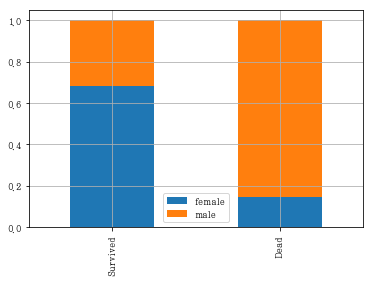

In [587]:
sS = sur.Sex.value_counts(normalize = True)
sD = nsur.Sex.value_counts(normalize = True)
dfS = pd.DataFrame([sS, sD], index = ['Survived', 'Dead'])
dfS.plot.bar(stacked = True,grid = True)

------------------------------
전체 탑승객 중 남성이 65%, 여성이 35%임에도 불구하고 전체 생존자 중 60%이상이 여성이고, 전체 사망자 중 80%이상이 남성인 것을 보아, 여성일수록 생존가능성이 높다고 볼 수 있다.


##### 결론: 여성일수록 생존가능성이 높다.

- Age



In [588]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [589]:
test.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [592]:
#Age 결측치 처리
train.Age = train.Age.fillna(29.699118)
test.Age =test.Age.fillna(29.699118)
#0~80세 나이를 9구간으로 나눔
bins = np.linspace(0,80,9)
bins

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.])

In [593]:
b = np.digitize(train.Age,bins = bins)
for i in range(len(train.Age)):
    train.Age[i] = b[i]
train.Age.head(10)

0    3.0
1    4.0
2    3.0
3    4.0
4    4.0
5    3.0
6    6.0
7    1.0
8    3.0
9    2.0
Name: Age, dtype: float64

In [594]:
train.Age.describe()

count    891.000000
mean       3.420875
std        1.356289
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: Age, dtype: float64

In [595]:
#test 데이터도 8개 구간으로 똑같이 나눔
b2 = np.digitize(test.Age, bins =bins)
for i in range(len(test.Age)):
    test.Age[i] = b2[i]
test.Age.head(5)

0    4.0
1    5.0
2    7.0
3    3.0
4    3.0
Name: Age, dtype: float64

In [596]:
#각 연령대별 생존자, 사망자 수
sur =train.loc[train.Survived==1]
nsur = train.loc[train.Survived==0]
dfA = pd.DataFrame([sur.Age.value_counts(), nsur.Age.value_counts()],index = ['Survived', 'Dead'])
dfA

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Survived,38.0,41.0,129.0,73.0,34.0,20.0,6.0,NaN,1.0
Dead,24.0,61.0,268.0,94.0,55.0,28.0,13.0,6.0,NaN


------------------------------------------
0~9세(1.0),와 70~80세(9.0)를 제외한 모든 연령대는 사망자수가 생존자수보다 많다. 특히 노년층(60~80대)은 그 차이가 더 심하다.
전체적으로 봤을때, 사망자와 생존자 평균은 30대이다.

##### 결론: 10세 미만일수록 생존 가능성이 높고, 60세 이상일수록 사망 가능성이 높다. 

- SibSp


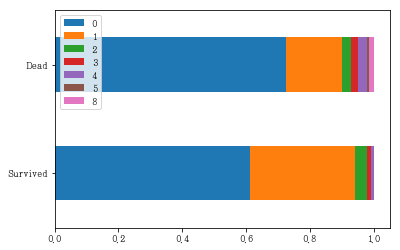

In [597]:
spS = sur.SibSp.value_counts(normalize = True)
spD = nsur.SibSp.value_counts(normalize = True)
dfS = pd.DataFrame([spS, spD],index = ['Survived', 'Dead'])
dfS.plot.barh(stacked= True)

In [598]:
sN = train.SibSp.value_counts()
sN

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

-------------------
동반 형제자매,배우자가 0~1명인 사람들이 생존자와 사망자 수의 80% 이상을 차지한다. 하지만 이것은 당연한 결과이다. 동반 형제자매 수가 1명 이하인 사람들이 대부분이기 때문이다.


##### 결론 : 동반 형제자매,배우자 수가 2명 이상인 승객이 적으므로 피처로 선택하기 힘들다.

- Parch

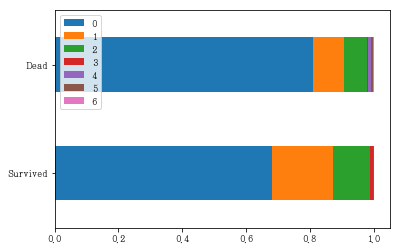

In [599]:
pS = sur.Parch.value_counts(normalize = True)
pD = nsur.Parch.value_counts(normalize =True)
dfP = pd.DataFrame([pS,pD],index = ['Survived', 'Dead'])
dfP.plot.barh(stacked= True)


In [600]:
dfP

,0,1,2,3,4,5,6
Survived,0.681287,0.190058,0.116959,0.008772,NaN,0.002924,NaN
Dead,0.810565,0.096539,0.072860,0.003643,0.007286,0.007286,0.001821


In [601]:
nP = train.Parch.value_counts()
nP


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

--------------------
##### 결론: 동반 부모,자식 수도 0~1명인 승객이 대부분이고 2명 이상인 승객이 거의 없기때문에 피처로 선택하기 힘들다.


- Fare

In [602]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [603]:
#요금을 9구간으로 나눔
b3 =[0,10,20,30,40,50,70,110,200,513]

In [604]:
bF = np.digitize(train.Fare,bins = b3)
for i in range(len(train.Fare)):
    train.Fare[i] = bF[i]
train.Fare.describe()

count    891.000000
mean       2.887767
std        2.243787
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        9.000000
Name: Fare, dtype: float64

In [605]:
for i in range(len(test.Fare)):
    test.Fare[i] = bF[i]

In [606]:
#갱신
sur = train.loc[train.Survived == 1]
nsur = train.loc[train.Survived ==0]

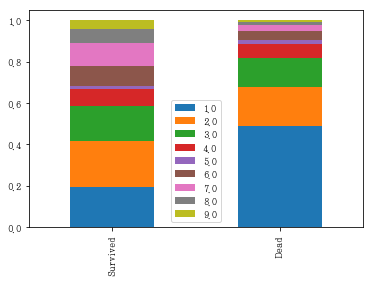

In [607]:
fS = sur.Fare.value_counts(normalize = True)
fD = nsur.Fare.value_counts(normalize = True)
dfF = pd.DataFrame([fS,fD], index= ['Survived', 'Dead'])
dfF.plot.bar(stacked = True)


In [608]:
#지불금액별 생존자, 사망자 수
m ={}
for i in range(1, 10):
    m[i] = [int(sur.Fare.loc[train.Fare == i].value_counts()),int(nsur.Fare.loc[train.Fare == i].value_counts())]

dfdd = pd.DataFrame(m, index = ['Survived', 'Dead'])
dfdd

,1,2,3,4,5,6,7,8,9
Survived,67,76,58,28,4,33,39,23,14
Dead,269,103,78,36,11,23,17,6,6


-----------------------------------
0~5(0~50달러)구간까지는 사망자가 생존자 보다 많고, 6~9구간은 생존자가 사망자보다 많다.

##### 결론: 요금을 많이 낸 승객은 생존할 가능성이 좀 더 높다.

- Embarked

In [609]:
train.Embarked.describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

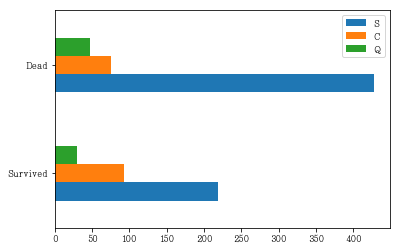

In [610]:
train.Embarked = train.Embarked.fillna('S')
test.Embarked = test.Embarked.fillna('S')
sE = sur.Embarked.value_counts()
dE = nsur.Embarked.value_counts()
dfE = pd.DataFrame([sE,dE],index = ['Survived', 'Dead'])
dfE.plot.barh()

In [611]:
dfE

,S,C,Q
Survived,219,93,30
Dead,427,75,47


S와 Q에서 탑승한 승객이 생존자 대비 사망자가 1.5배 이상이고, C는 생존자가 사망자보다 더 많다. 
##### 결론: S와Q에서 탑승할수록 사망할 가능성이  높고, C에서 탈수록 생존할 가능성이 높다.

### Selected Feature
- (Name)
- Pclass
- Sex
- Age
- Fare
- Embarked

In [621]:
feature = ['Pclass', 'Sex','Age','Fare','Embarked']

#categorization
for i in feature:
    train[i] = train[i].astype('category')
    test[i] = test[i].astype('category')
#string -> int
train['Sex'].cat.categories = [1,2]
test['Sex'].cat.categories = [1,2]
train['Embarked'].cat.categories = [1,2,3]
test['Embarked'].cat.categories = [1,2,3]

In [613]:
x_train =train[feature]
x_test = test[feature]

In [614]:
x_train.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,2,3.0,1.0,3
1,1,1,4.0,7.0,1
2,3,1,3.0,1.0,3
3,1,1,4.0,6.0,3
4,3,2,4.0,1.0,3


In [615]:
x_test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,2,4.0,1.0,2
1,3,1,5.0,7.0,3
2,2,2,7.0,1.0,2
3,3,2,3.0,6.0,3
4,3,1,3.0,1.0,3


In [616]:
#최종적으로 구할 것
result = 'Survived'
y_train = train[result]
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Learning & Prediction

In [617]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# Result

In [618]:
submission = pd.read_csv('Desktop/데이터분석/titanic/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [619]:
submission['Survived'] = y_pred

In [620]:
submission.to_csv('Desktop/데이터분석/Titanic/submission.csv',index =  False)